In [154]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
from pandas import read_csv
import matplotlib.patheffects as pe
from matplotlib.patches import FancyBboxPatch, BoxStyle
from matplotlib.colors import LinearSegmentedColormap

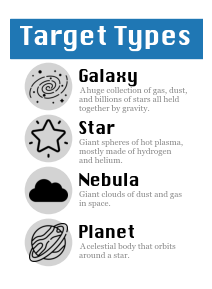

In [516]:
fig, ax = plt.subplots()
fig.set_size_inches((2.5,3.5))

    
# stripe
stripe = plt.Rectangle((0,1150), 1200, 200,color='tab:blue')
ax.add_patch(stripe)

target_types = [{"name" : "galaxy",
                 "description": "A huge collection of gas, dust, \nand billions of stars all held \ntogether by gravity."
                 },
                {"name" :"star",
                "description": "Giant spheres of hot plasma, \nmostly made of hydrogen \nand helium."},
                {"name" :"nebula",
                "description": "Giant clouds of dust and gas \nin space.",},
                {"name" :"planet",
                "description": "A celestial body that orbits \naround a star."},
]

for i,ttype in enumerate(target_types):
    x,y = 100,(900-(100*i*2.7))
    # Add circle
    name = ttype['name']
    circle = plt.Circle((x+100, y+100), 120, color='lightgray', zorder=1)
    ax.add_patch(circle)
    
    # Add Object Icon
    icon1 = Image.open(f'icons/{name}.png').resize((200,200))
    ax.imshow(icon1, extent=(x,x+200,y,y+200),zorder=3)
    
    ax.text(x+250, y+150, name.title(), ha='left', va='center', color='k',
             fontsize=12, font='silom', fontweight='bold')
    
    txt  = ax.text(x+260, y+100, ttype["description"], ha='left', va='top', color='#888888',
             fontsize=6, font='Georgia')    

# Title Text
ax.text(500, 1250, 'Target Types', ha='center', va='center', color='white',
             fontsize=18, font='silom', fontweight='bold')

# Additional Formatting
ax.set_xlim(0,1000)
ax.set_ylim(0,1400)
ax.set_axis_off()
plt.axis('off')

plt.savefig(f'final_cards/rule_cards/RULES_target_types.png', bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()
    

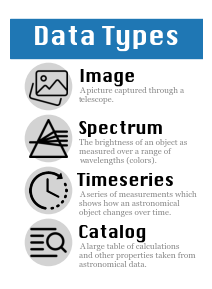

In [522]:
fig, ax = plt.subplots()
fig.set_size_inches((2.5,3.5))

    
# stripe
stripe = plt.Rectangle((0,1150), 1200, 200,color='tab:blue')
ax.add_patch(stripe)


data_types = [{"name" : "image",
                "description": "A picture captured through a \ntelescope.",},
                {"name" :"spectrum",
                "description": "The brightness of an object as \nmeasured over a range of \nwavelengths (colors).",},
                {"name" :"timeseries",
                "description": "A series of measurements which\nshows how an astronomical \nobject changes over time.",},
                {"name" :"catalog",
                "description": "A large table of calculations \nand other properties taken from \nastronomical data.",},
]

for i,dtype in enumerate(data_types):
    name = dtype["name"]
    x,y = 100,(900-(100*i*2.7))
    # Add circle
    circle = plt.Circle((x+100, y+100), 120, color='lightgray', zorder=1)
    ax.add_patch(circle)
    
    # Add Object Icon
    icon1 = Image.open(f'icons/{name}.png').resize((200,200))
    ax.imshow(icon1, extent=(x,x+200,y,y+200),zorder=3)
    
    ax.text(x+250, y+150, name.title(), ha='left', va='center', color='k',
             fontsize=12, font='silom', fontweight='bold')
    
    ax.text(x+260, y+100, dtype['description'], ha='left', va='top', color='#888888',
             fontsize=6, font='Georgia')

    
    

# Title Text
ax.text(500, 1250, 'Data Types', ha='center', va='center', color='white',
             fontsize=18, font='silom', fontweight='bold')



# Additional Formatting
ax.set_xlim(0,1000)
ax.set_ylim(0,1400)
ax.set_axis_off()
plt.axis('off')

plt.savefig(f'final_cards/rule_cards/RULES_data_types.png', bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()
    

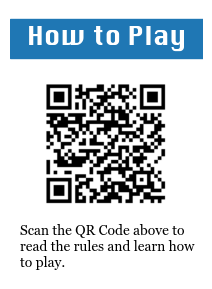

In [579]:
fig, ax = plt.subplots()
fig.set_size_inches((2.5,3.5))

    
# stripe
stripe = plt.Rectangle((0,1150), 1200, 200,color='tab:blue')
ax.add_patch(stripe)

# Title Text
ax.text(500, 1250, 'How to Play', ha='center', va='center', color='white',
             fontsize=18, font='silom', fontweight='bold')

ax.text(50, 50, 'Scan the QR Code above to \nread the rules and learn how \nto play.', ha='left', va='bottom', color='k',
             fontsize=10, font='Georgia')

icon1 = Image.open(f'icons/qr_code.png').resize((800,800))
ax.imshow(icon1, extent=(100, 900, 300, 1100),zorder=3)


# Additional Formatting
ax.set_xlim(0,1000)
ax.set_ylim(0,1400)
ax.set_axis_off()
plt.axis('off')

plt.savefig(f'final_cards/rule_cards/RULES_instructions.png', bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()
    

In [545]:
def make_telescope_card(title, image, wavelength, tel_color):
    '''
    Fucntion to make Observation cards for MAST Match!
    
    Parameters
    ------------
    title: str
        Title for Card, typically name of telescope
    image: str
        File containing image to use for background art
    wavelength: list
       wavelength(s) valid for telescope    
    tel_color:
        accent color for telescope
    '''
    fig, ax = plt.subplots()
    fig.set_size_inches((2.5,3.5))


    r = plt.Rectangle((0, 0), 1000, 1400, color='k',zorder=0)
    ax.add_patch(r)

    # Background Image
    img = Image.open(f'telescope_imgs/{image}')
    img = img.resize((1000,1400)) #card size is 2.5 x 3.5 inches
    shift = 45
    ax.imshow(img,zorder=0, extent=(0,1000,0-shift,1400-shift))
    # shift = 600
    # zoom = 0.3
    # z1 = 1000*zoom
    # z2 = 1400*zoom
    # ax.imshow(img,extent=(0-z1, 1000+z1, 0-z2-shift,1400+z2-shift),zorder=0)
    # White box to make consistent sizing
    # r = plt.Rectangle((0, 0), 1000, 700, color='w',zorder=0)
    # ax.add_patch(r)

    ax.add_patch(plt.Circle((500.0, 650.0), 630.0,
                   facecolor='none', edgecolor='k', lw=300, zorder=1))
    ax.add_patch(plt.Circle((500.0, 650.0), 475.0,
                   facecolor='none', edgecolor=tel_color, lw=6, zorder=1))

    # Title
    ax.text(500, 1350, f"{title.split(' Space Telescope')[0]}", ha='center', va='top', color=tel_color,
                fontsize=18, font='silom', fontweight='bold')
    if 'Space Telescope' in title:
        ax.text(500, 1225, "- SPACE TELESCOPE - ", ha='center', va='top', color='w',
                fontsize=10, font='silom')
        
    

    # Wavelength Box
    if wavelength[0] == 'optical':
        wl_cmap = plt.cm.rainbow
    elif wavelength[0] == 'infrared':
        #wl_cmap = plt.cm.gist_heat
        wl_cmap = LinearSegmentedColormap.from_list("", ['gold','red','darkred','k'])

    elif wavelength[0] == 'ultraviolet':
        wl_cmap = plt.cm.cool
    
    # First box
    plt.imshow([[0.,1], [0.,1]], 
                cmap = wl_cmap, 
                interpolation = 'bicubic',extent=(75,925,25,125),zorder=4)
    ax.text(500, 75, f'{wavelength[0].title()} Telescope', ha='center', va='center', color='white',
                fontsize=10, font='Georgia', fontweight='bold',zorder=5)
        
    #Second box (if applicable):
    if len(wavelength) ==2:
        ax.add_patch(plt.Rectangle((0, 0), 1000, 275, color='k',zorder=2))
        if wavelength[1] == 'optical':
            wl_cmap = plt.cm.rainbow
        elif wavelength[1] == 'infrared':
            #wl_cmap = plt.cm.gist_heat
            wl_cmap = LinearSegmentedColormap.from_list("", ['gold','red','darkred','k'])
        elif wavelength[1] == 'ultraviolet':
            wl_cmap = plt.cm.cool
            
        plt.imshow([[0.,1], [0.,1]], 
                   cmap = wl_cmap, 
                   interpolation = 'bicubic',extent=(75,925,150,250),zorder=4)
        ax.text(500, 200, f'{wavelength[1].title()} Telescope', ha='center', va='center', color='white',
                 fontsize=10, font='Georgia', fontweight='bold',zorder=5)

    
    # flavor text?
    #ax.text(50, 150, f'[fun facts or flavor text here]', ha='left', va='top', color='darkgray',
    #         fontsize=10, font='Georgia')

        
    # Add Colored Rectangle
    #r = plt.Rectangle((0, 0), 1000, 700, color=tel_color,zorder=1)
    #ax.add_patch(r)
    #ax.text(50, 612, 'Telescope Card', ha='left', va='bottom', color='white',
    #         fontsize=8, font='georgia', fontweight='bold')
            #path_effects=[pe.withStroke(linewidth=4, foreground="k")])

    
    # Additional Formatting
    ax.set_xlim(0,1000)
    ax.set_ylim(0,1400)
    ax.set_axis_off()
    plt.axis('off')

    plt.savefig(f'final_cards/telescope_cards/TEL_{image}', bbox_inches='tight', pad_inches=0.01, dpi=200)
    plt.show()
    

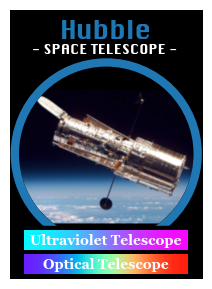

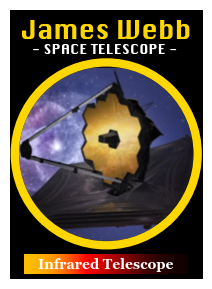

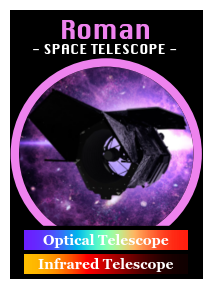

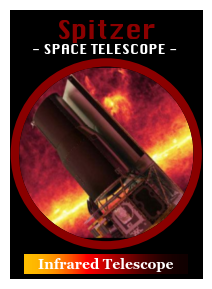

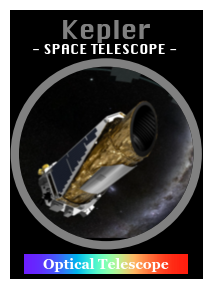

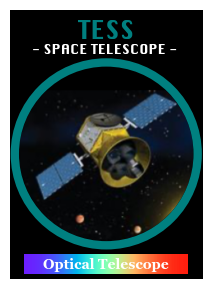

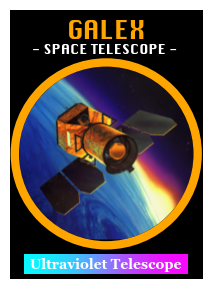

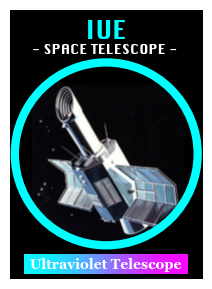

In [548]:
title='Hubble Space Telescope'
tel_color='tab:blue'
image='hst.png'
wavelength=['optical', 'ultraviolet']
make_telescope_card(title, image, wavelength, tel_color)


title='James Webb Space Telescope'
tel_color='gold'
image='jwst.png'
wavelength=['infrared']
make_telescope_card(title, image, wavelength, tel_color)

title='Roman Space Telescope'
tel_color='violet'
image='roman.png'
wavelength=['infrared', 'optical']
make_telescope_card(title, image, wavelength, tel_color)

title='Spitzer Space Telescope'
tel_color='darkred'
image='spitzer.png'
wavelength=['infrared']
make_telescope_card(title, image, wavelength, tel_color)


title='Kepler Space Telescope'
tel_color='gray'
image='kepler.png'
wavelength=['optical']
make_telescope_card(title, image, wavelength, tel_color)

title='TESS Space Telescope'
#title='Transiting\nExoplanet\nSurvey\nSatellite'
tel_color='teal'
image='tess.png'
wavelength=['optical']
make_telescope_card(title, image, wavelength, tel_color)


title='GALEX Space Telescope'
#title='Galaxy\nEvolution\nExplorer'
tel_color='orange'
image='galex.png'
wavelength=['ultraviolet']
make_telescope_card(title, image, wavelength, tel_color)


title='IUE Space Telescope'
#title='(International Ultraviolet Explorer'
tel_color='cyan'
image='iue.png'
wavelength=['ultraviolet']
make_telescope_card(title, image, wavelength, tel_color)


